In [1]:
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
def keys(f):
    return [key for key in f.keys()]
import scipy
from scipy import signal
from scipy.fftpack import fft, fftshift ,ifft

from scipy.interpolate import CubicSpline as spline
#h5py.run_tests()
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c

In [2]:
def analyze(rh):
    
    
    
    peaks,prop=scipy.signal.find_peaks(abs(rh[:,1]))
    mx=np.where(abs(rh[peaks])==np.amax(abs(rh[peaks,1])))[0][0]
    
    for i in range(mx,len(peaks)):
        if abs(rh[peaks[i],1])<abs(rh[peaks[i+1],1]):
            mn=i
            break
            
    for i in range(mn,len(peaks)):
        if abs(rh[peaks[i],1])>abs(rh[peaks[i+1],1]):
            mx2=i
            break
    
    dt=rh[peaks[mn],0]-rh[peaks[mx],0]
    rhM=abs(rh[peaks[mx2],1])
    return dt,rhM

Example of the way we will do the analysis 

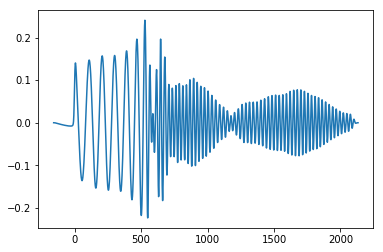

In [3]:
name = 'data/THC:0003.h5'                                 #change that
file=h5py.File(name,'r')
dat = list(file["/rh_22"])
rh = np.array(file["/rh_22/Rh_l2_m2_r00400.txt" ])


plt.plot(rh[:,0],rh[:,1])
plt.show()

In [4]:
peaks,prop=scipy.signal.find_peaks(abs(rh[:,1]))
mx=np.where(abs(rh[peaks])==np.amax(abs(rh[peaks,1])))[0][0]


In [5]:
for i in range(mx,len(peaks)):
    if abs(rh[peaks[i],1])<abs(rh[peaks[i+1],1]):
        mn=i
        break

In [6]:
for i in range(mn,len(peaks)):
    if abs(rh[peaks[i],1])>abs(rh[peaks[i+1],1]):
        mx2=i
        break

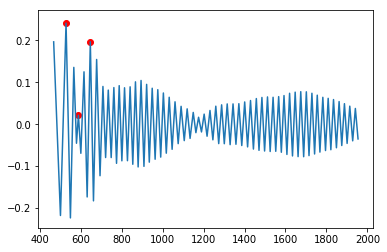

In [7]:
plt.plot(rh[peaks[mx-2:mn+100],0],rh[peaks[mx-2:mn+100],1])
plt.scatter(rh[peaks[mx],0],rh[peaks[mx],1],color='r')
plt.scatter(rh[peaks[mn],0],rh[peaks[mn],1],color='r')
plt.scatter(rh[peaks[mx2],0],rh[peaks[mx2],1],color='r')

In [8]:
dt=rh[peaks[mn],0]-rh[peaks[mx],0]
rhM=abs(rh[peaks[mx2],1])
dt,rhM

(60.44444444399994, 0.196328044677)

Do the analysis for the BAM data

In [9]:
dtM2=np.zeros(31)
rhM2=np.zeros(31)
names2=list()
code2=np.zeros(31)
l=0
for m in range(0,2):
    for k in range(0,10):
        for j in range(0,10):
            name = 'data/BAM:0%s%s%s.h5' %(m,k,j)
            try:
                file=h5py.File(name,'r')
                dat = list(file["/rh_22"])
                rh = np.array(file["/rh_22/%s" %dat[-1]])
                dtM2[l],rhM2[l]=analyze(rh)
                names2.append(name)
                code2[l]=m*100+k*10+j
                l=l+1
                
            except OSError:
                pass

Do the analysis for the THC data

In [10]:
dtM1=np.zeros(23)
rhM1=np.zeros(23)
names1=list()
code1=np.zeros(23)
l=0

for m in range(0,4):
    for k in range(0,10):
        for j in range(0,10):
            name = 'data/THC:0%s%s%s.h5' %(m,k,j)
            try:
                file=h5py.File(name,'r')
                dat = list(file["/rh_22"])
                rh = np.array(file["/rh_22/Rh_l2_m2_r00400.txt" ])
                dtM1[l],rhM1[l]=analyze(rh)
                names1.append(name)
                code1[l]=m*100+k*10+j
                l=l+1
            
            except OSError:
                pass

In [11]:
dtM=np.concatenate((dtM1,dtM2))
rhM=np.concatenate((rhM1,rhM2))
names=np.concatenate((names1,names2))
code=np.concatenate((code1,code2))

In [12]:
for i in range(len(dtM)):
    print(code[i],dtM[i],rhM[i])

1.0 68.15999999999997 0.167729108244
2.0 60.92307692300005 0.191132344265
3.0 60.44444444399994 0.196328044677
4.0 48.64244741899995 0.181850608195
5.0 53.53846153899997 0.159448186548
6.0 53.71428571400003 0.184229847362
7.0 54.275618373999976 0.140210490983
10.0 57.0 0.190685597404
11.0 70.08000000000004 0.164323089993
12.0 48.92307692300005 0.181353145993
13.0 60.44444444399994 0.163107726296
14.0 47.72466539200002 0.166943901772
15.0 54.46153846199991 0.154435765567
16.0 53.71428571400003 0.142089134717
17.0 37.60000000000002 0.149297348629
18.0 66.0 0.183572582404
19.0 59.55555555600006 0.193282404971
20.0 50.47801147200005 0.15663924119
21.0 53.53846153799998 0.159195290514
29.0 52.97777778 0.165000700358
31.0 43.13575525800002 0.173676055629
32.0 48.0 0.166896181765
36.0 46.222222220000276 0.155795219536
2.0 94.58000000000015 0.1403105
3.0 61.22599999999966 0.1715187
4.0 45.45500000000004 0.1875771
9.0 79.68000000000006 0.1160773
10.0 61.924800000000005 0.1769572
22.0 37.8330000

Read the metadata for the BAM data

In [13]:

SLy=1
H4=2
MS1=3
MPA1=4
ALF2=5
MS1b=6
ms1b=6
ENG=7


In [14]:
q2 = np.zeros(31)
mas2=np.zeros(31)
eos=np.zeros(31)


i=0
for m in range(0,2):
    for k in range(0,10):
        for j in range(0,10):
            name = 'metadata/BAM:0%s%s%s.txt' %(m,k,j)
            try:
                f=open(name)
                lines=f.readlines() 
                exec(lines[10])
                q2[i] = id_mass_ratio
                exec(lines[8])
                mas2[i]=id_mass
                if i==0:
                    eos[i]=8 #by hand because 2H can not be given a value
                if i>0:
                    exec(lines[15])
                    eos[i]=id_eos
                
                i=i+1
            except OSError:
                pass



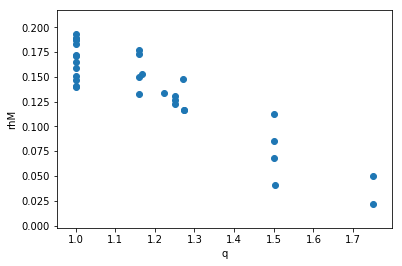

In [15]:
plt.scatter(q2,rhM2)
plt.xlabel('q')
plt.ylabel('rhM')
plt.show()

Tidal Deformability Analysis

In [16]:
mas12=np.zeros([31,2])
for i in range(31):
    mas12[i,0]=(q2[i]*mas2[i])/(1+q2[i])
    mas12[i,1]=(mas2[i])/(1+q2[i])

In [17]:
m_r1=np.load('tid_def/SLy.npy')
m_r2=np.load('tid_def/H4.npy')
m_r3=np.load('tid_def/MS1.npy')
m_r4=np.load('tid_def/MPA1.npy')
m_r5=np.load('tid_def/ALF2.npy')
m_r6=np.load('tid_def/MS1b.npy')
m_r7=np.load('tid_def/ENG.npy')
m_r8=np.load('tid_def/2H.npy')


k_l1=np.load('tid_def/k_l_SLy.npy')
k_l2=np.load('tid_def/k_l_H4.npy')
k_l3=np.load('tid_def/k_l_MS1.npy')
k_l4=np.load('tid_def/k_l_MPA1.npy')
k_l5=np.load('tid_def/k_l_ALF2.npy')
k_l6=np.load('tid_def/k_l_MS1b.npy')
k_l7=np.load('tid_def/k_l_ENG.npy')
k_l8=np.load('tid_def/k_l_2H.npy')

In [18]:
mx=np.amax(m_r1[0])
idx=np.where(m_r1[0]==mx)
idx=idx[0][0]
cs1=spline(m_r1[0][1:idx],k_l1[0][1:idx])
cs11=spline(m_r1[0][1:idx],m_r1[1][1:idx])

mx=np.amax(m_r2[0])
idx=np.where(m_r2[0]==mx)
idx=idx[0][0]
cs2=spline(m_r2[0][1:idx],k_l2[0][1:idx])
cs21=spline(m_r2[0][1:idx],m_r2[1][1:idx])

mx=np.amax(m_r3[0])
idx=np.where(m_r3[0]==mx)
idx=idx[0][0]
cs3=spline(m_r3[0][1:idx],k_l3[0][1:idx])
cs31=spline(m_r3[0][1:idx],m_r3[1][1:idx])

mx=np.amax(m_r4[0])
idx=np.where(m_r4[0]==mx)
idx=idx[0][0]
cs4=spline(m_r4[0][1:idx],k_l4[0][1:idx])
cs41=spline(m_r4[0][1:idx],m_r4[1][1:idx])

mx=np.amax(m_r5[0])
idx=np.where(m_r5[0]==mx)
idx=idx[0][0]
cs5=spline(m_r5[0][1:idx],k_l5[0][1:idx])
cs51=spline(m_r5[0][1:idx],m_r5[1][1:idx])

mx=np.amax(m_r6[0])
idx=np.where(m_r6[0]==mx)
idx=idx[0][0]
cs6=spline(m_r6[0][1:idx],k_l6[0][1:idx])
cs61=spline(m_r6[0][1:idx],m_r6[1][1:idx])

mx=np.amax(m_r7[0])
idx=np.where(m_r7[0]==mx)
idx=idx[0][0]
cs7=spline(m_r7[0][1:idx],k_l7[0][1:idx])
cs71=spline(m_r7[0][1:idx],m_r7[1][1:idx])

mx=np.amax(m_r8[0])
idx=np.where(m_r8[0]==mx)
idx=idx[0][0]
cs8=spline(m_r8[0][1:idx],k_l8[0][1:idx])
cs81=spline(m_r8[0][1:idx],m_r8[1][1:idx])

In [19]:
k212=np.zeros([31,2])
r12=np.zeros([31,2])
for i in range(31):
    if eos[i]==1:
        k212[i,0]=cs1(mas12[i,0])
        k212[i,1]=cs1(mas12[i,1])
        r12[i,0]=cs11(mas12[i,0])
        r12[i,1]=cs11(mas12[i,1])
    elif eos[i]==2:
        k212[i,0]=cs2(mas12[i,0])
        k212[i,1]=cs2(mas12[i,1])
        r12[i,0]=cs21(mas12[i,0])
        r12[i,1]=cs21(mas12[i,1])
    elif eos[i]==3:
        k212[i,0]=cs3(mas12[i,0])
        k212[i,1]=cs3(mas12[i,1])
        r12[i,0]=cs31(mas12[i,0])
        r12[i,1]=cs31(mas12[i,1])
    elif eos[i]==4:
        k212[i,0]=cs4(mas12[i,0])
        k212[i,1]=cs4(mas12[i,1])
        r12[i,0]=cs41(mas12[i,0])
        r12[i,1]=cs41(mas12[i,1])
    elif eos[i]==5:
        k212[i,0]=cs5(mas12[i,0])
        k212[i,1]=cs5(mas12[i,1])
        r12[i,0]=cs51(mas12[i,0])
        r12[i,1]=cs51(mas12[i,1])
    elif eos[i]==6:
        k212[i,0]=cs6(mas12[i,0])
        k212[i,1]=cs6(mas12[i,1])
        r12[i,0]=cs61(mas12[i,0])
        r12[i,1]=cs61(mas12[i,1])
    elif eos[i]==7:
        k212[i,0]=cs7(mas12[i,0])
        k212[i,1]=cs7(mas12[i,1])
        r12[i,0]=cs71(mas12[i,0])
        r12[i,1]=cs71(mas12[i,1])
    elif eos[i]==8:
        k212[i,0]=cs8(mas12[i,0])
        k212[i,1]=cs8(mas12[i,1])
        r12[i,0]=cs81(mas12[i,0])
        r12[i,1]=cs81(mas12[i,1])
    

In [20]:
l=np.zeros([31,2])
lamda2=np.zeros(31)
for i in range(31):
    l[i,0]=(2.0/3.0)*k212[i,0]*(1.0/pow(mas12[i,0]/r12[i,0],5))
    l[i,1]=(2.0/3.0)*k212[i,1]*(1.0/pow(mas12[i,1]/r12[i,1],5))
    lamda2[i]=(16/13)*( ( (mas12[i,0]+12*mas12[i,1])*pow(mas12[i,0],4)*l[i,0]+(mas12[i,1]+12*mas12[i,0])*pow(mas12[i,1],4)*l[i,1] )/pow( mas12[i,0]+mas12[i,1],5 ) )

Read the metadata for the THC data

In [21]:
q1 = np.zeros(23)
mas1=np.zeros(23)
lamda1=np.zeros(23)
i=0
for m in range(0,4):
    for k in range(0,10):
        for j in range(0,10):
            name = 'metadata/THC:0%s%s%s.txt' %(m,k,j)
            try:
                f=open(name)
                lines=f.readlines() 
                exec(lines[10])
                q1[i] = id_mass_ratio
                exec(lines[8])
                mas1[i]=id_mass
                exec(lines[17])
                lamda1[i]=id_Lambda
                i=i+1
            except OSError:
                pass

In [22]:
lamda=np.concatenate((lamda1,lamda2))
q=np.concatenate((q1,q2))
mas=np.concatenate((mas1,mas2))

In [23]:
#just for BAM data
for i in range(31):
    print(code[i],'|',eos[i],'|',lamda2[i])

1.0 | 8.0 | 2228.66078013686
2.0 | 5.0 | 711.998448595807
3.0 | 5.0 | 709.0777160383772
4.0 | 5.0 | 1115.4811046642862
5.0 | 5.0 | 717.364126949879
6.0 | 7.0 | 462.5425468490587
7.0 | 2.0 | 1070.235704031977
10.0 | 2.0 | 1067.914772779719
11.0 | 2.0 | 1087.326046087623
12.0 | 2.0 | 986.7813565945231
13.0 | 2.0 | 1058.950440252139
14.0 | 2.0 | 1158.0790779591039
15.0 | 4.0 | 589.6281506150176
16.0 | 3.0 | 1702.9762578692325
17.0 | 3.0 | 1677.6640800914543
18.0 | 6.0 | 1490.1295856942913
19.0 | 6.0 | 1351.4816453111982
20.0 | 6.0 | 2278.7914390875317
21.0 | 6.0 | 1381.5360583349461
29.0 | 6.0 | 584.2906021518363
31.0 | 6.0 | 1444.825305970212
32.0 | 6.0 | 409.4810710177216
36.0 | 6.0 | 1528.5289209665073
2.0 | 1.0 | 377.25949228092526
3.0 | 1.0 | 697.543578955504
4.0 | 1.0 | 641.9781234935981
9.0 | 1.0 | 490.15820421895046
10.0 | 1.0 | 384.20370949060646
22.0 | 1.0 | 697.6233331095921
35.0 | 1.0 | 352.0189992304683
36.0 | 1.0 | 392.5763389563371


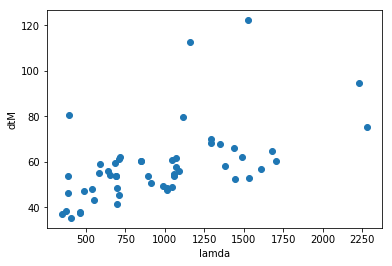

In [24]:
plt.scatter(lamda,dtM)
plt.xlabel('lamda')
plt.ylabel('dtM')
plt.show()

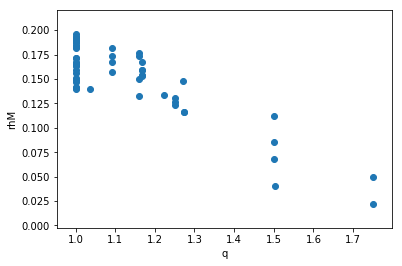

In [25]:
plt.scatter(q,rhM)
plt.xlabel('q')
plt.ylabel('rhM')
plt.show()

In [26]:
np.save('results/lamda.npy',lamda)
np.save('results/q.npy',q)
np.save('results/rhM.npy',rhM)
np.save('results/dtM.npy',dtM)